# Q1 Simple Linear Regression y=mx+b

The goal of task is to build a linear regression model from the ground up using numpy.

In [1]:
%matplotlib inline

#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/hw2/q1.csv')
X = list(df.X)
Y = list(df.Y)

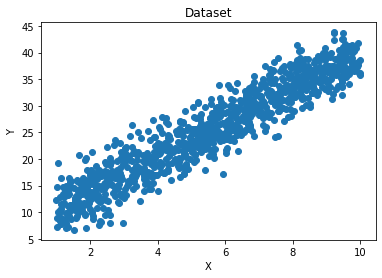

In [125]:
#Plot the dataset
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [126]:
#hyperparamters
learning_rate = 0.001
initial_b = 0
initial_m = 0
num_iterations = 100

#### Define cost function

In [127]:
def compute_cost(X, Y, b, m):
    total_cost = 0
    N = float(len(X))
    
    #Compute sum of squared errors
    for x, y in zip(X, Y):
        total_cost += pow(y - (m*x + b) , 2)
        
    #Return average of squared error
    return total_cost / N

In [128]:
compute_cost(X, Y, 1,1)

398.72051924266106

#### Define Gradient Descent functions

In [133]:
def gradient_descent_runner(X, Y, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(X, Y, b, m))
        b, m = step_gradient(X, Y, b, m, learning_rate)

    return [b, m, cost_graph]

def step_gradient(X, Y, b_current, m_current, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(X))

    #Calculate Gradient
    for x,y in zip(X, Y):
        m_gradient += (2/N)*x*(y - ((m_current*x) + b_current))
        b_gradient += (2/N)*(y - ((m_current*x) + b_current))
    
    #Update current m and b
    m_updated = m_current + learning_rate * m_gradient
    b_updated = b_current + learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [134]:
b, m, cost_graph = gradient_descent_runner(X,Y, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(X, Y, b, m))

Optimized b: 0.8714051605717171
Optimized m: 4.217447849416838
Minimized cost: 16.321474191555108


#### Plotting the cost per iterations

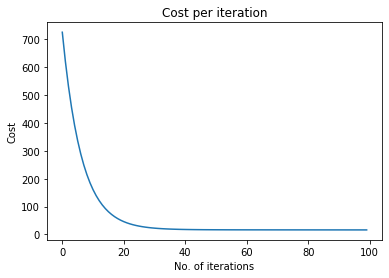

In [135]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

#### Plot line of best fit

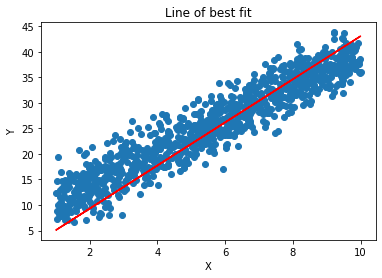

In [199]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = [xi * m + b for xi in X]
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line of best fit')
plt.show()

## Try playing with LR and number of iterations to reach faster convergence/better results
### Hint: try setting big LR and seeing

# Q2

Fit sklearn linear regression on the q1 dataset. output the parameters and calculate R^2

In [29]:
X = np.array(X).reshape(len(X),1)
Y = np.array(Y)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lrm = LinearRegression().fit(X, Y)
# Your Code Here
pred = lrm.predict(X)

m coef

In [39]:
lrm.coef_

array([3.23934294])

b coef

In [40]:
lrm.intercept_

7.473837028012515

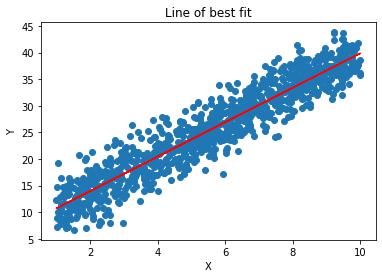

In [41]:
#Plot dataset
plt.scatter(X, Y)
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line of best fit')
plt.show()

R^2 on X,Y

In [43]:
# Your Code Here
1 - (sum(np.square(Y - pred)) / sum(np.square(Y - Y.mean())) )

0.8958096318219146

## Q3

An indoor positioning system (IPS) is a system to locate objects or people inside a building using radio waves, magnetic fields, acoustic signals, or other sensory information collected by mobile devices. There are several commercial systems on the market, but there is no standard for an IPS system.

IPSes use different technologies, including distance measurement to nearby anchor nodes (nodes with known positions, e.g., WiFi access points), magnetic positioning, dead reckoning. They either actively locate mobile devices and tags or provide ambient location or environmental context for devices to get sensed.

According to the [report](https://www.marketsandmarkets.com/Market-Reports/indoor-positioning-navigation-ipin-market-989.html), the global indoor location market size is expected to grow from USD 7.11 Billion in 2017 to USD 40.99 Billion by 2022, at a Compound Annual Growth Rate (CAGR) of 42.0% during the forecast period. Hassle-free navigation, improved decision-making, and increased adoption of connected devices are boosting the growth of the indoor location market across the globe.

In this problem, you are going to use signals from seven different wi-fi access points to define in which room the user is located.

In [1]:
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_set = pandas.read_csv('../../data/hw2/train_set.csv')
cv_set = pandas.read_csv('../../data/hw2/cv_set.csv')

train_data = train_set[['wifi'+str(i) for i in range(1, len(train_set.columns) - 1)]]
train_labels = train_set['room']
cv_data = cv_set[['wifi'+str(i) for i in range(1, len(cv_set.columns) - 1)]]
cv_labels = cv_set['room']

In [3]:
print(train_data[:2])
print(train_labels[:2])

   wifi1  wifi2  wifi3  wifi4  wifi5  wifi6  wifi7
0    -68    -57    -61    -65    -71    -85    -85
1    -63    -60    -60    -67    -76    -85    -84
0    1
1    1
Name: room, dtype: int64


In [4]:
print(len(train_labels))
print(len(cv_labels))

1603
397


In [5]:
# fit RandomForestClassifier without parameters to training data
model = RandomForestClassifier().fit(train_data, train_labels)
model

RandomForestClassifier()

In [6]:
def predict(model):
    # make predictions for CV data
    pred_labels = model.predict(cv_data)

    # evaluate predictions
    accuracy = accuracy_score(cv_labels, pred_labels)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [7]:
predict(model)

Accuracy: 98.24%


## Tuning Hyperparams

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [24]:
param_test1 = {
  'n_estimators':np.arange(100,500,100),
  'min_samples_split': [2,5,10]
}

param_test2 = {
 'max_depth':range(3,10,2)
}

param_test3 = {
    'n_estimators': [1, 10, 50, 100, 400, 1000],
    'max_depth': [1, 2, 5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False],
    "random_state": [42],
}

In [25]:
gsearch = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=param_test3,
                      n_jobs=-1,
                      scoring='accuracy',
                      verbose=1)

gsearch.fit(cv_data, cv_labels)
gsearch.best_params_, gsearch.best_score_

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


({'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 400,
  'random_state': 42},
 0.9848417721518988)

In [26]:
model = RandomForestClassifier(**gsearch.best_params_).fit(train_data, train_labels)
predict(model)

Accuracy: 98.49%


# Q4

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [2]:
df = pd.read_csv('../../data/hw2/creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119365.0,-0.648816,1.085729,0.644292,-0.484424,0.035148,0.685317,-0.511474,-3.572304,1.432904,...,3.274767,0.175637,0.182150,-0.671470,-0.582489,-0.212519,-0.117028,-0.309974,19.95,0
1,46241.0,-7.841175,-10.951944,2.713263,2.615309,9.103611,-6.069196,-7.482114,1.346419,1.767848,...,1.008598,0.068748,2.031901,0.030105,-0.237909,0.297684,-0.193230,0.397233,52.00,0
2,150410.0,-0.109611,0.668436,-0.348581,0.030305,0.634939,-1.736213,0.814125,-0.208214,0.128891,...,0.321396,1.019215,-0.022182,0.306645,-0.403441,-0.159221,0.368169,0.200434,25.89,0
3,78763.0,1.268174,-0.667519,0.455831,-0.624309,-0.947193,-0.287198,-0.647256,0.076475,-0.839515,...,0.109237,0.278014,0.002229,0.234976,0.389169,-0.254429,0.013218,0.003945,28.95,0
4,156695.0,-1.027329,1.798271,-1.710085,-1.218292,0.732341,-1.435121,1.050546,0.310398,-0.055893,...,0.193389,0.722371,-0.129830,0.677651,-0.186372,0.048191,0.179429,0.045144,0.77,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [5]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 166 0.0016652789342214821
Number of frauds on y_train: 326 0.0017609818283961022


In [6]:
logistic = LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.998876438309441


/home/eugene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99517
           1       0.68      0.60      0.64       166

    accuracy                           1.00     99683
   macro avg       0.84      0.80      0.82     99683
weighted avg       1.00      1.00      1.00     99683



In [65]:
logistic = LogisticRegression(C=1e5, n_jobs=-1, class_weight={0: 0.35, 1: 0.8}, random_state=0)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9992275513377407


In [66]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99517
           1       0.75      0.80      0.78       166

    accuracy                           1.00     99683
   macro avg       0.88      0.90      0.89     99683
weighted avg       1.00      1.00      1.00     99683

